hangzhou_1_conn0_ep1.csv: Mean = 0.00
hangzhou_1_conn0_ep2.csv: Mean = 0.16
hangzhou_1_conn0_ep3.csv: Mean = 0.11
hangzhou_1_conn0_ep4.csv: Mean = 0.10
hangzhou_1_conn0_ep5.csv: Mean = 0.11
hangzhou_1_conn0_ep6.csv: Mean = 0.10
hangzhou_1_conn0_ep7.csv: Mean = 0.10
hangzhou_1_conn0_ep8.csv: Mean = 0.10
hangzhou_1_conn0_ep9.csv: Mean = 0.11
hangzhou_1_conn0_ep10.csv: Mean = 0.10
hangzhou_1_conn0_ep11.csv: Mean = 0.09
hangzhou_1_conn0_ep12.csv: Mean = 0.10
hangzhou_1_conn0_ep13.csv: Mean = 0.10
hangzhou_1_conn0_ep14.csv: Mean = 0.09
hangzhou_1_conn0_ep15.csv: Mean = 0.08
hangzhou_1_conn0_ep16.csv: Mean = 0.08
hangzhou_1_conn0_ep17.csv: Mean = 0.08
hangzhou_1_conn0_ep18.csv: Mean = 0.09
hangzhou_1_conn0_ep19.csv: Mean = 0.08
hangzhou_1_conn0_ep20.csv: Mean = 0.08
hangzhou_1_conn0_ep21.csv: Mean = 0.08
hangzhou_1_conn0_ep22.csv: Mean = 0.09
hangzhou_1_conn0_ep23.csv: Mean = 0.08
hangzhou_1_conn0_ep24.csv: Mean = 0.07
hangzhou_1_conn0_ep25.csv: Mean = 0.08
hangzhou_1_conn0_ep26.csv: Mean = 

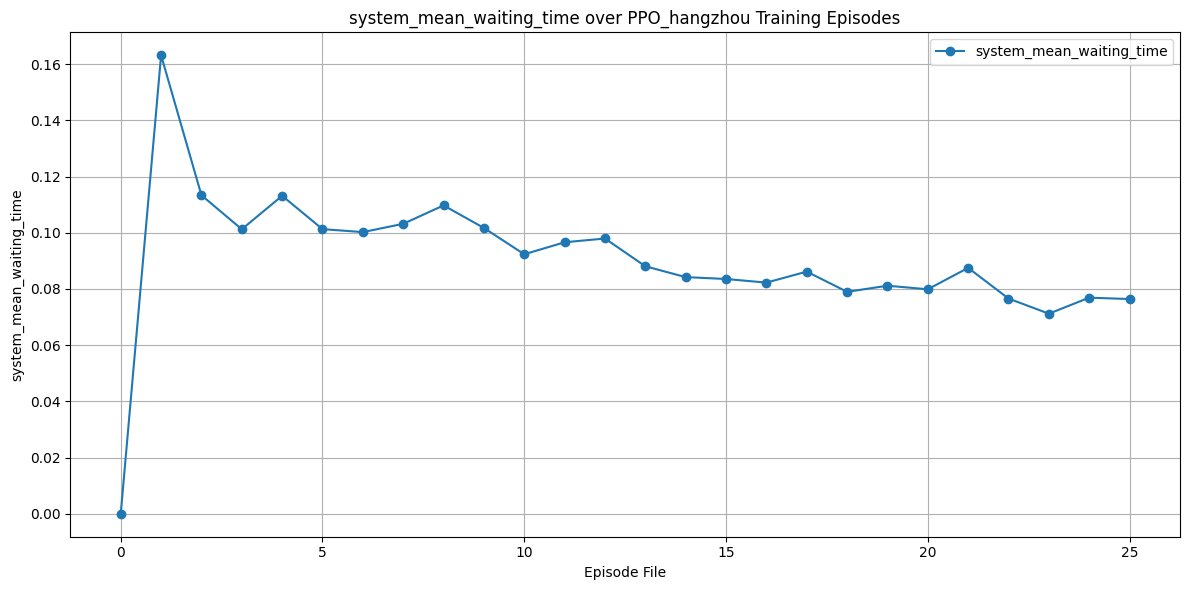


Percentage Change Between Consecutive Files:
hangzhou_1_conn0_ep1.csv → hangzhou_1_conn0_ep2.csv: +inf%
hangzhou_1_conn0_ep2.csv → hangzhou_1_conn0_ep3.csv: -30.53%
hangzhou_1_conn0_ep3.csv → hangzhou_1_conn0_ep4.csv: -10.68%
hangzhou_1_conn0_ep4.csv → hangzhou_1_conn0_ep5.csv: +11.76%
hangzhou_1_conn0_ep5.csv → hangzhou_1_conn0_ep6.csv: -10.49%
hangzhou_1_conn0_ep6.csv → hangzhou_1_conn0_ep7.csv: -1.04%
hangzhou_1_conn0_ep7.csv → hangzhou_1_conn0_ep8.csv: +2.94%
hangzhou_1_conn0_ep8.csv → hangzhou_1_conn0_ep9.csv: +6.35%
hangzhou_1_conn0_ep9.csv → hangzhou_1_conn0_ep10.csv: -7.31%
hangzhou_1_conn0_ep10.csv → hangzhou_1_conn0_ep11.csv: -9.21%
hangzhou_1_conn0_ep11.csv → hangzhou_1_conn0_ep12.csv: +4.63%
hangzhou_1_conn0_ep12.csv → hangzhou_1_conn0_ep13.csv: +1.39%
hangzhou_1_conn0_ep13.csv → hangzhou_1_conn0_ep14.csv: -10.09%
hangzhou_1_conn0_ep14.csv → hangzhou_1_conn0_ep15.csv: -4.38%
hangzhou_1_conn0_ep15.csv → hangzhou_1_conn0_ep16.csv: -0.79%
hangzhou_1_conn0_ep16.csv → hangzhou_

In [13]:
import glob
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# --- Settings ---
pattern = "/home/maryam.alshehyari/sumo-rl/outputs/ppo/hangzhou/hangzhou_1_conn0_ep*.csv"
target_column = "system_mean_waiting_time"

# --- Helper: Extract episode number ---
def extract_episode_number(filename):
    match = re.search(r'ep(\d+)', filename)
    return int(match.group(1)) if match else -1

# --- Get and sort CSV files by episode number ---
csv_files = glob.glob(pattern)
csv_files = sorted(csv_files, key=lambda f: extract_episode_number(f))

means = []
file_labels = []
improvements = []

previous_mean = None

for file_path in csv_files:
    file = os.path.basename(file_path)
    try:
        df = pd.read_csv(file_path)

        if target_column not in df.columns:
            print(f"Column '{target_column}' not found in {file}, skipping...")
            continue

        mean_val = df[target_column].mean()
        means.append(mean_val)
        file_labels.append(file)

        # Compute % improvement from previous step
        if previous_mean is not None:
            delta = mean_val - previous_mean
            percent_change = (delta / previous_mean) * 100 if previous_mean != 0 else float('inf')
            improvements.append(percent_change)
        else:
            improvements.append(0)

        previous_mean = mean_val

        print(f"{file}: Mean = {mean_val:.2f}")

    except Exception as e:
        print(f"Error reading {file}: {e}")

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.plot( means, marker='o', label='system_mean_waiting_time')
# plt.xticks(rotation=45)
plt.xlabel("Episode File")
plt.ylabel("system_mean_waiting_time")
plt.title("system_mean_waiting_time over PPO_hangzhou Training Episodes")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Optional: Print percentage improvements
print("\nPercentage Change Between Consecutive Files:")
for i in range(1, len(file_labels)):
    print(f"{file_labels[i-1]} → {file_labels[i]}: {improvements[i]:+.2f}%")
# system_mean_waiting_time
# system_total_arrived
# agents_total_stopped


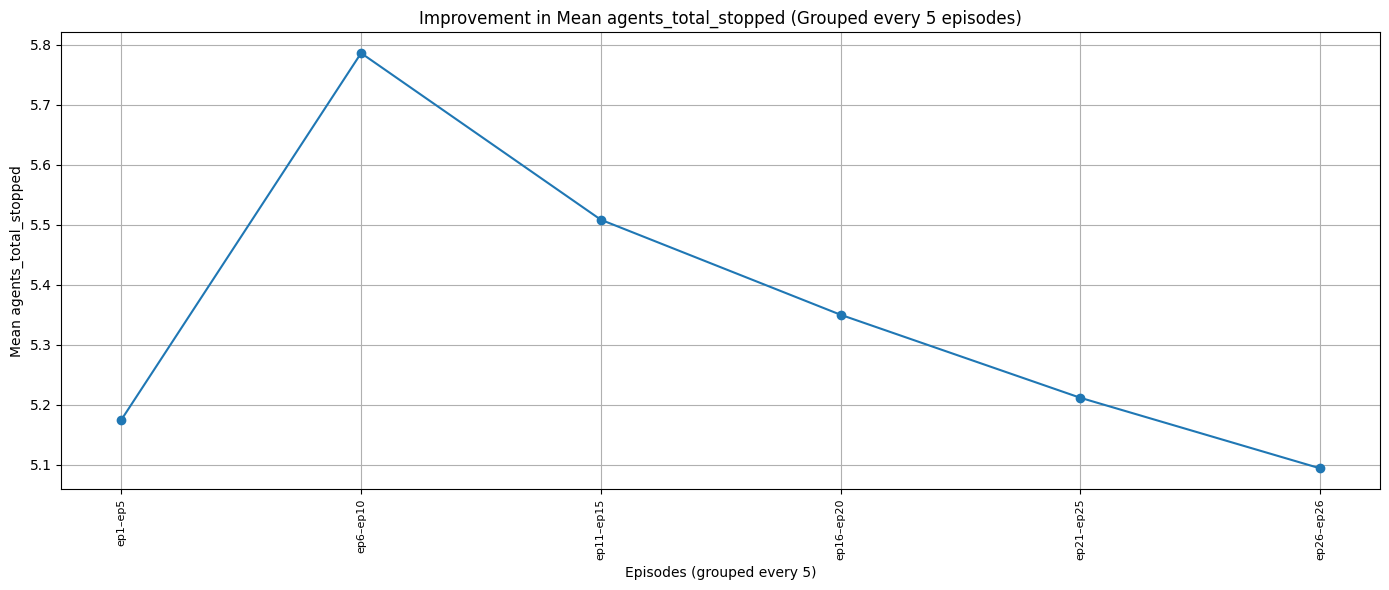

In [14]:
import glob
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# --- Settings ---
pattern = "/home/maryam.alshehyari/sumo-rl/outputs/ppo/hangzhou/hangzhou_1_conn0_ep*.csv"
target_column = "agents_total_stopped"
group_size = 5  # Number of episodes per group

# --- Helper: Extract episode number ---
def extract_episode_number(filename):
    match = re.search(r'ep(\d+)', filename)
    return int(match.group(1)) if match else -1

# --- Get and sort files numerically ---
csv_files = glob.glob(pattern)
csv_files = sorted(csv_files, key=lambda f: extract_episode_number(f))

group_means = []
group_labels = []

current_group = []
current_label = ""

for idx, file_path in enumerate(csv_files):
    ep_num = extract_episode_number(file_path)
    file = os.path.basename(file_path)

    try:
        df = pd.read_csv(file_path)

        if target_column not in df.columns:
            print(f"Column '{target_column}' not found in {file}, skipping...")
            continue

        mean_val = df[target_column].mean()
        current_group.append(mean_val)

        if (idx + 1) % group_size == 0 or idx == len(csv_files) - 1:
            group_mean = sum(current_group) / len(current_group)
            label = f"ep{extract_episode_number(csv_files[idx - len(current_group) + 1])}–ep{ep_num}"
            group_means.append(group_mean)
            group_labels.append(label)
            current_group = []

    except Exception as e:
        print(f"Error reading {file}: {e}")

# --- Plot ---
plt.figure(figsize=(14, 6))
plt.plot(group_labels, group_means, marker='o')
plt.xticks(rotation=90, fontsize=8)
plt.xlabel(f"Episodes (grouped every {group_size})")
plt.ylabel(f"Mean {target_column}")
plt.title(f"Improvement in Mean {target_column} (Grouped every {group_size} episodes)")
plt.grid(True)
plt.tight_layout()
plt.show()


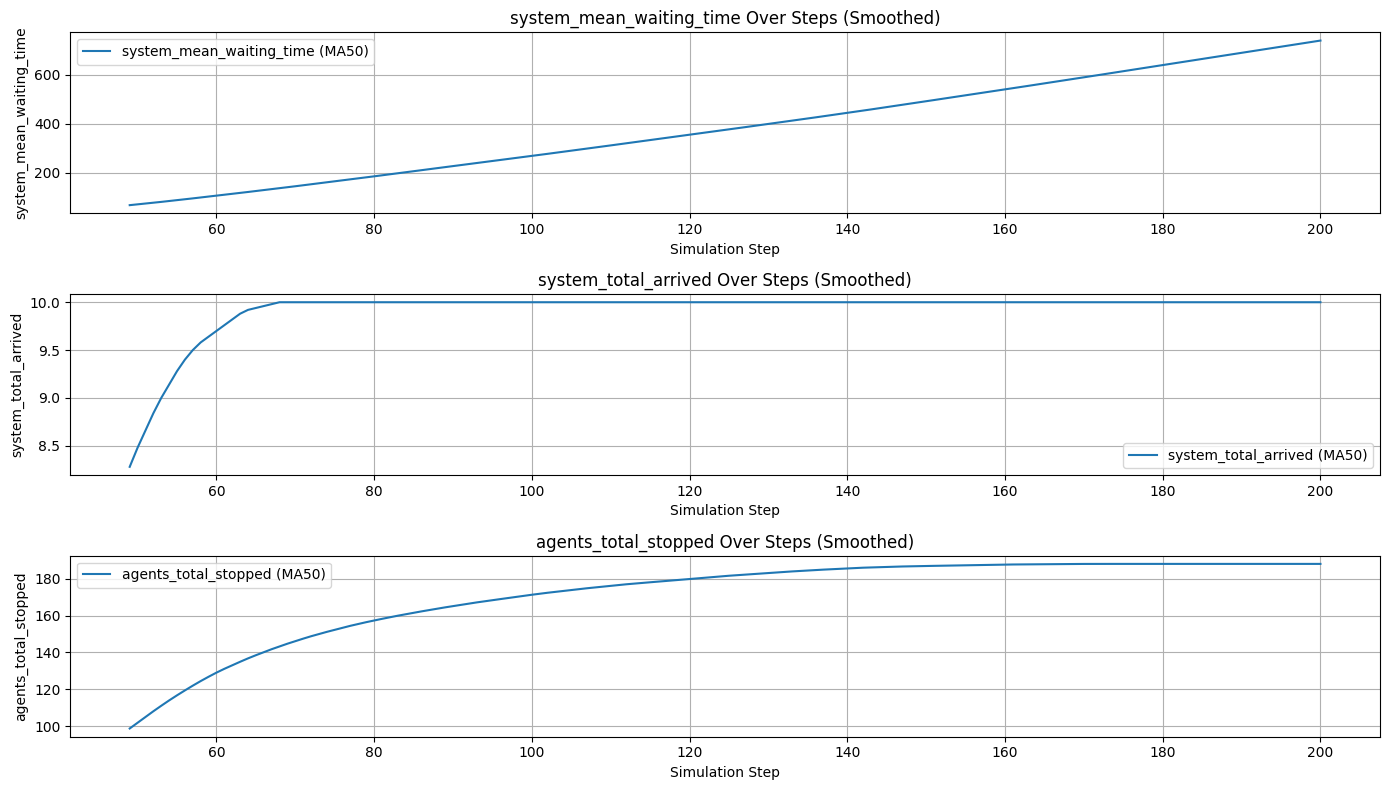

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Settings ---
file_path = "/home/maryam.alshehyari/sumo-rl-old/outputs/dqn_tapas_ad/dqn_tapas_ad_conn0_ep999.csv"  # Adjust to your latest ep file
columns_to_plot = [
    "system_mean_waiting_time",
    "system_total_arrived",
    "agents_total_stopped"
]
moving_avg_window = 50

# --- Load CSV ---
df = pd.read_csv(file_path)

# --- Check columns ---
missing_cols = [col for col in columns_to_plot if col not in df.columns]
if missing_cols:
    print(f"Missing columns: {missing_cols}")
    raise ValueError("Cannot proceed — required columns missing.")

# --- Apply Moving Average ---
df_smoothed = df[columns_to_plot].rolling(window=moving_avg_window).mean()

# --- Plot ---
plt.figure(figsize=(14, 8))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    plt.plot(df.index, df_smoothed[col], label=f"{col} (MA{moving_avg_window})")
    plt.title(f"{col} Over Steps (Smoothed)")
    plt.xlabel("Simulation Step")
    plt.ylabel(col)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


In [8]:
import pickle

with open("/home/maryam.alshehyari/outputs/4x4/ql_hangzhou/ql-4x4grid_run3/q_tables/intersection_4_3_q_table.pkl", "rb") as f:
    q_table = pickle.load(f)

print(q_table)


{(0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): [0.021854681959811117, 0.04082829522174424], (0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): [0.006679777046278558, 0.04084800414905732], (1, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): [0.003556816146693934, 0.04086765554302551], (1, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): [0.040872402948916406, -0.002483255128092804], (1, 0.0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): [0.0, 0], (1, 1.0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): [-0.004000000000000001, 0], (0, 0.0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): [-0.000999999999999998, 0], (0, 1.0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): [-0.003, 0.012089557129443823]}


In [25]:
import pickle
import os

# === Config ===
q_table_path = "/home/maryam.alshehyari/outputs/4x4/ql_hangzhou/ql-4x4grid_run3/q_tables/intersection_4_2_q_table.pkl"
output_path = "/home/maryam.alshehyari/sumo-rl/outputs/qtable_4x4/intersection_4_2_q_table_normlized.pkl"

# === Load Q-table ===
with open(q_table_path, "rb") as f:
    q_table = pickle.load(f)

# === Detect structure (check if values are list or dict)
first_val = next(iter(q_table.values()))
if isinstance(first_val, list):
    structure = "list"
elif isinstance(first_val, dict):
    structure = "dict"
else:
    raise ValueError("Unknown Q-table structure!")

print(f"Q-table uses {structure}-based action encoding")

# === Normalize
all_q_values = []
if structure == "list":
    for q_values in q_table.values():
        all_q_values.extend(q_values)
elif structure == "dict":
    for actions in q_table.values():
        all_q_values.extend(actions.values())

# Avoid division by zero
max_abs_q = max(abs(q) for q in all_q_values if q != 0) or 1

# Normalize
normalized_q_table = {}
for state, q_vals in q_table.items():
    if structure == "list":
        normalized_q_table[state] = [q / max_abs_q for q in q_vals]
    else:
        normalized_q_table[state] = {a: q / max_abs_q for a, q in q_vals.items()}

# Save
with open(output_path, "wb") as f:
    pickle.dump(normalized_q_table, f)

print(f"✅ Normalized Q-table saved to {output_path}")
print(f"🔢 Max |Q| used for scaling: {max_abs_q:.4f}")


Q-table uses list-based action encoding
✅ Normalized Q-table saved to /home/maryam.alshehyari/sumo-rl/outputs/qtable_4x4/intersection_4_2_q_table_normlized.pkl
🔢 Max |Q| used for scaling: 0.0451


In [39]:
import pandas as pd
import os

# === CONFIGURE THIS ===
csv_file = 'ql/ql_2way-single-intersection_cologne1/ql_cologne_conn0_ep1.csv'  # replace with your CSV file path
column_to_analyze = 'agents_total_stopped'  # replace with the column name

# === LOAD CSV AND COMPUTE AVERAGE ===
if os.path.exists(csv_file):
    df = pd.read_csv(csv_file)
    
    if column_to_analyze in df.columns:
        average_value = df[column_to_analyze].mean()
        print(f"Average of '{column_to_analyze}' in '{csv_file}': {average_value:.2f}")
    else:
        print(f"Column '{column_to_analyze}' not found in {csv_file}")
else:
    print(f"File '{csv_file}' not found.")

    
# ql
# ql/ql_2way-single-intersection_cologne1/ql_cologne_conn0_ep1.csv
# ql/4x4/ql_hangzhou/ql-4x4grid_run3_3times_conn0_ep4.csv
   
# dqn 
# dqn/cologne1/dqn_cologne1_conn0_ep5.csv
# dqn/hangzhou/dqn_hangzhou_conn0_ep200.csv
    
#  dqn- with qtable
# dqn_with_Qtable/cologne1/dqn_cologne1_withQtable_conn0_ep500.csv
# dqn_with_Qtable/hangzhou/dqn_hangzhou_withqtable_conn0_ep200.csv

# ppo
# ppo/cologne1/ppo_cologne1_final/ppo_cologne1_conn0_ep166.csv
# ppo/hangzhou/ppo_conn0_ep2.csv
    
# qrdqn
# qrdq/qrdqn_cologne1_2time_conn0_ep24.csv 
    
# python plot.py -f dqn/hangzhou/dqn_hangzhou_conn0_ep200.csv -t dqn_hangzhou -yaxis system_total_arrived -ma 50
# python plot.py -f ql/ql_2way-single-intersection_cologne1/ql_cologne_conn0_ep1.csv -yaxis agents_total_stopped -ma 50

Average of 'agents_total_stopped' in 'ql/ql_2way-single-intersection_cologne1/ql_cologne_conn0_ep1.csv': 4.46


In [30]:
Average of 'system_mean_waiting_time' in 'ql/ql_2way-single-intersection_cologne1/ql_cologne_conn0_ep1.csv': 2.45
Average of 'system_mean_waiting_time' in 'ql/4x4/ql_hangzhou/ql-4x4grid_run3_3times_conn0_ep4.csv': 0.07
Average of 'system_mean_waiting_time' in 'dqn/cologne1/dqn_cologne1_conn0_ep5.csv': 86.47
Average of 'system_mean_waiting_time' in 'dqn/hangzhou/dqn_hangzhou_conn0_ep200.csv': 0.11
Average of 'system_mean_waiting_time' in 'dqn_with_Qtable/cologne1/dqn_cologne1_withQtable_conn0_ep500.csv': 6.98
Average of 'system_mean_waiting_time' in 'dqn_with_Qtable/hangzhou/dqn_hangzhou_withqtable_conn0_ep200.csv': 0.11
Average of 'system_mean_waiting_time' in 'ppo/cologne1/ppo_cologne1_final/ppo_cologne1_conn0_ep166.csv': 0.75
Average of 'system_mean_waiting_time' in 'ppo/hangzhou/ppo_conn0_ep2.csv': 0.01
Average of 'system_mean_waiting_time' in 'qrdq/qrdqn_cologne1_2time_conn0_ep24.csv': 35.85



SyntaxError: invalid syntax (1446673246.py, line 1)

In [43]:
import pandas as pd

# === FILES TO ANALYZE ===
csv_files = [
    'ql/ql_2way-single-intersection_cologne1/ql_cologne_conn0_ep1.csv',
    'ql/4x4/ql_hangzhou/ql-4x4grid_run3_3times_conn0_ep4.csv',
    'dqn/cologne1/dqn_cologne1_conn0_ep5.csv',
    'dqn/hangzhou/dqn_hangzhou_conn0_ep200.csv',
    'dqn_with_Qtable/cologne1/dqn_cologne1_withQtable_conn0_ep500.csv',
    'dqn_with_Qtable/hangzhou/dqn_hangzhou_withqtable_conn0_ep200.csv',
    'ppo/cologne1/ppo_cologne1_final/ppo_cologne1_conn0_ep166.csv',
    'ppo/hangzhou/ppo_conn0_ep2.csv',
    'qrdq/qrdqn_cologne1_2time_conn0_ep24.csv',
]

# === COLUMNS TO ANALYZE ===
columns_of_interest = [
    'system_mean_waiting_time',
    'agents_total_stopped',
    'system_total_arrived'
]

# === STORE RESULTS ===
results = []

# === PROCESS EACH FILE ===
for file_path in csv_files:
    try:
        df = pd.read_csv(file_path)
        averages = {}
        for col in columns_of_interest:
            if col in df.columns:
                averages[col] = df[col].mean()
            else:
                averages[col] = None  # mark as missing
        results.append({
            'file': file_path,
            **averages
        })
    except Exception as e:
        results.append({
            'file': file_path,
            'system_mean_waiting_time': None,
            'agents_total_stopped': None,
            'system_total_arrived': None,
            'error': str(e)
        })

# === CONVERT TO DATAFRAME & PRINT ===
summary_df = pd.DataFrame(results)
pd.set_option('display.max_colwidth', None)
print(summary_df.to_string(index=False))


                                                            file  system_mean_waiting_time  agents_total_stopped  system_total_arrived
ql/ql_2way-single-intersection_cologne1/ql_cologne_conn0_ep1.csv                  2.833835              4.735192            477.015000
         ql/4x4/ql_hangzhou/ql-4x4grid_run3_3times_conn0_ep4.csv                  0.073619              5.261000           1775.302000
                         dqn/cologne1/dqn_cologne1_conn0_ep5.csv                287.380312              4.669679            479.591425
                       dqn/hangzhou/dqn_hangzhou_conn0_ep200.csv                  0.106872              6.516000           1770.709000
dqn_with_Qtable/cologne1/dqn_cologne1_withQtable_conn0_ep500.csv                  6.981451             12.517413            352.497512
dqn_with_Qtable/hangzhou/dqn_hangzhou_withqtable_conn0_ep200.csv                  0.111992              6.442000           1772.486000
    ppo/cologne1/ppo_cologne1_final/ppo_cologne1_conn0_

In [53]:
import pandas as pd

# === FILES TO ANALYZE ===
csv_files = [
    'ql/ql_2way-single-intersection_cologne1/ql_cologne_conn0_ep1.csv',
    'ql/4x4/ql_hangzhou/ql-4x4grid_run3_3times_conn0_ep4.csv',
    'dqn/cologne1/dqn_cologne1_conn0_ep5.csv',
    'dqn/hangzhou/dqn_hangzhou_conn0_ep200.csv',
    'dqn_with_Qtable/cologne1/dqn_cologne1_withQtable_conn0_ep500.csv',
    'dqn_with_Qtable/hangzhou/dqn_hangzhou_withqtable_conn0_ep200.csv',
    'ppo/cologne1/ppo_cologne1_final/ppo_cologne1_conn0_ep166.csv',
    'ppo/hangzhou/hangzhou_1_conn0_ep26.csv',
    'qrdqn/cologne1/qrdqn_cologne1_2time_conn0_ep22.csv',
    'ppo/hangzhou_final_conn0_ep13.csv',
    'ppo_cologne1_final_conn0_ep250.csv',
    'ppo_eval_conn1_ep172.csv',
]

# === COLUMNS TO ANALYZE ===
columns_of_interest = [
    'system_mean_waiting_time',
    'agents_total_stopped',
    'system_total_arrived'
]

# === STORE RESULTS ===
results = []

# === PROCESS EACH FILE ===
for file_path in csv_files:
    try:
        df = pd.read_csv(file_path)
        averages = {}
        for col in columns_of_interest:
            averages[col] = df[col].mean() if col in df.columns else None

        # Find first step when system_total_arrived == system_total_departed
        finish_step = None
        if 'system_total_arrived' in df.columns and 'system_total_departed' in df.columns:
            match_rows = df[
                (df['system_total_arrived'] == df['system_total_departed']) &
                (df['system_total_arrived'] != 0) &
                (df.iloc[:, 0] > 300)
            ]
            if not match_rows.empty:
                finish_step = match_rows.iloc[0, 0]  # First column = step number

        results.append({
            'file': file_path,
            **averages,
            'finish_step': finish_step
        })

    except Exception as e:
        results.append({
            'file': file_path,
            'system_mean_waiting_time': None,
            'agents_total_stopped': None,
            'system_total_arrived': None,
            'finish_step': None,
            'error': str(e)
        })

# === CONVERT TO DATAFRAME & PRINT ===
summary_df = pd.DataFrame(results)
pd.set_option('display.max_colwidth', None)
print(summary_df.to_string(index=False))


                                                            file  system_mean_waiting_time  agents_total_stopped  system_total_arrived  finish_step
ql/ql_2way-single-intersection_cologne1/ql_cologne_conn0_ep1.csv                  2.833835              4.735192            477.015000       1755.0
         ql/4x4/ql_hangzhou/ql-4x4grid_run3_3times_conn0_ep4.csv                  0.073619              5.261000           1775.302000       4370.0
                         dqn/cologne1/dqn_cologne1_conn0_ep5.csv                287.380312              4.669679            479.591425       5690.0
                       dqn/hangzhou/dqn_hangzhou_conn0_ep200.csv                  0.106872              6.516000           1770.709000       4475.0
dqn_with_Qtable/cologne1/dqn_cologne1_withQtable_conn0_ep500.csv                  6.981451             12.517413            352.497512        650.0
dqn_with_Qtable/hangzhou/dqn_hangzhou_withqtable_conn0_ep200.csv                  0.111992              6.442000